# PROYECTO API

## Librerías

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [137]:
data = pd.read_csv('train.csv')

In [138]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [139]:
# Variable Objetivo: Survived
# revisar la cantidad de valores nulos dentro de mi dataframe
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0.5, 1.0, 'Cantidad de Sobrevivientes')

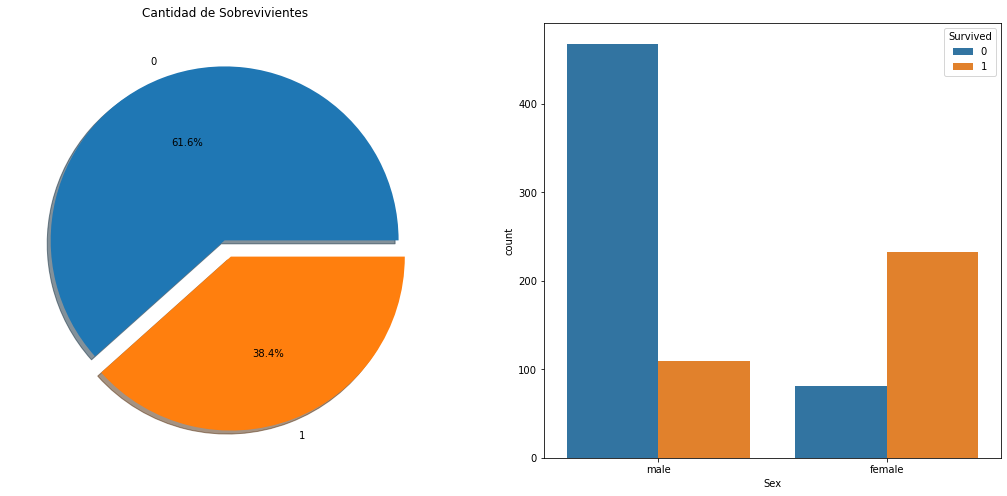

In [140]:
f, ax = plt.subplots(1,2, figsize = (18,8))

data['Survived'].value_counts().plot.pie(autopct = '%1.1f%%' , ax = ax[0], explode = [0, 0.1], shadow = True)
ax[0].set_title('Sobrevivientes')
ax[0].set_ylabel('')

sns.countplot('Sex', hue='Survived', data= data, ax= ax[1])
ax[0].set_title('Cantidad de Sobrevivientes')

In [ ]:
# Ingenieria de caracteristicas

In [141]:
data['PassengerId'].count()

891

In [142]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [143]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex'>

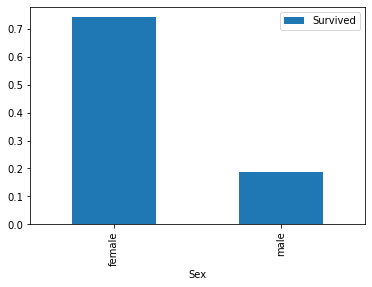

In [144]:
# Gráfica del promedio de mujeres y hombres y los que sobreviven
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar()

In [ ]:
# Variable Ordinal

In [145]:
pd.crosstab(data ['Pclass'], data['Survived'], margins=True).style.background_gradient(cmap= 'twilight')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Text(0.5, 0, 'Clase')

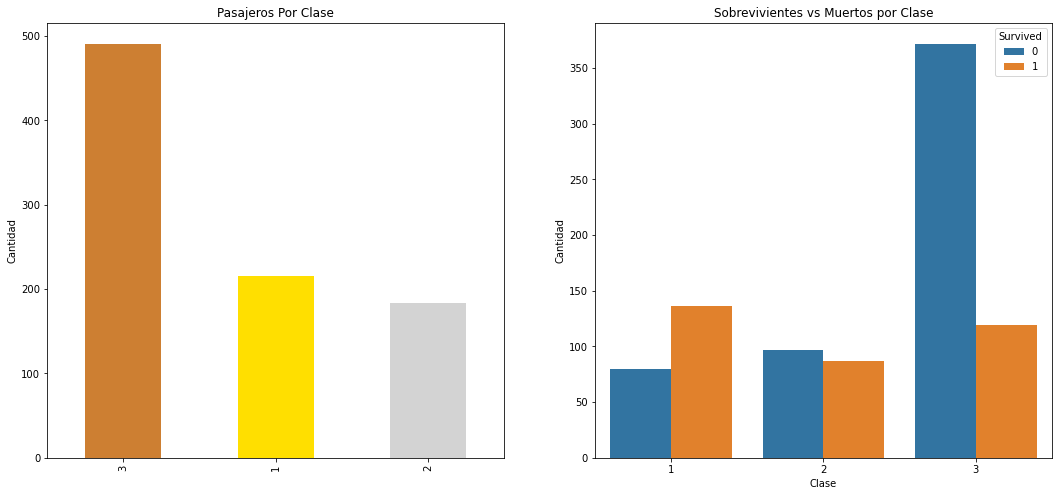

In [146]:
f, ax = plt.subplots(1,2, figsize = (18,8))

data['Pclass'].value_counts().plot.bar(ax = ax[0], color = ['#CD7F32', '#FFDF00', '#D3D3D3'])
ax[0].set_title('Pasajeros Por Clase')
ax[0].set_ylabel('Cantidad')

sns.countplot('Pclass', hue='Survived', data=data,ax=ax[1])
ax[1].set_title('Sobrevivientes vs Muertos por Clase')
ax[1].set_ylabel('Cantidad')
ax[1].set_xlabel('Clase')

In [ ]:
# Tasa de superviviencia en base al sexo y clase

In [147]:
pd.crosstab( [data['Sex'], data['Survived']], data['Pclass'], margins=True).style.background_gradient(cmap = 'twilight')

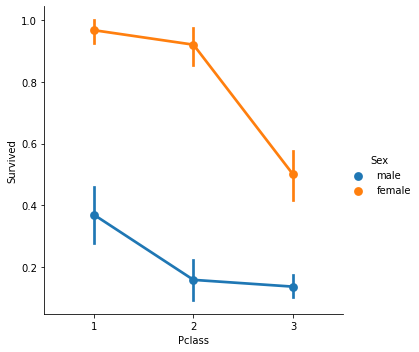

In [148]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data = data)
plt.show()

In [ ]:
# Analizando el precio del pasaje (Caracteristicas continuas)

In [149]:
print("El pasaje mas Alto: ", data['Fare'].max())
print("El pasaje mas Bajo: ", data['Fare'].min())

El pasaje mas Alto:  512.3292
El pasaje mas Bajo:  0.0


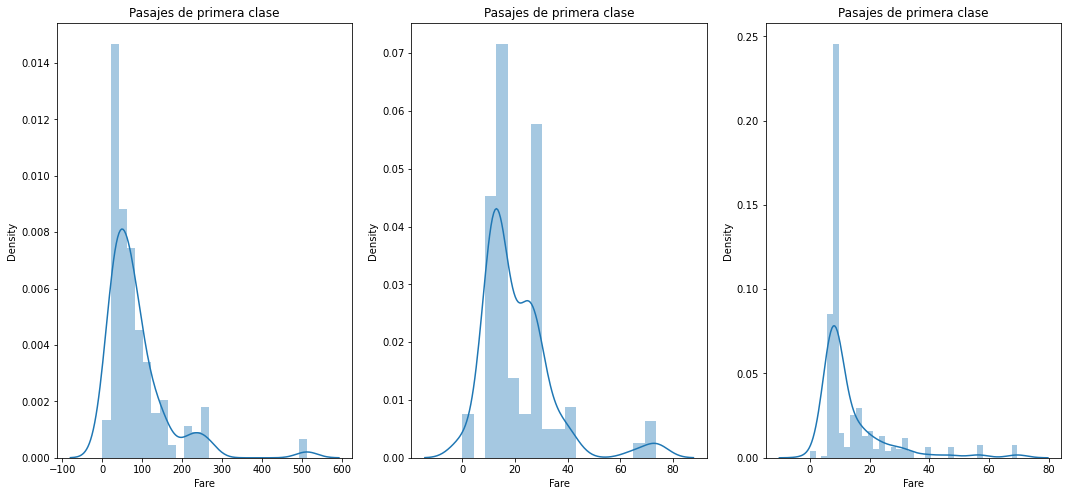

In [150]:
f, ax = plt.subplots(1, 3, figsize = (18,8))
sns.distplot( data[ data['Pclass'] == 1 ]['Fare'], ax = ax[0] )
ax[0].set_title('Pasajes de primera clase')

sns.distplot( data[ data['Pclass'] == 2 ]['Fare'], ax = ax[1] )
ax[1].set_title('Pasajes de primera clase')

sns.distplot( data[ data['Pclass'] == 3 ]['Fare'], ax = ax[2] )
ax[2].set_title('Pasajes de primera clase')

plt.show()

In [ ]:
# Limpieza de Datos

In [151]:
# Normalización
data['rango_de_edad'] = 0
data.loc[data['Age'] <= 16, 'rango_de_edad'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <=32), 'rango_de_edad'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <=48), 'rango_de_edad'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <=64), 'rango_de_edad'] = 3
data.loc[data['Age']  > 64, 'rango_de_edad'] = 4

In [152]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,rango_de_edad
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


In [153]:
#Comprobar el número de pasajeros de cada banda
data['rango_de_edad'].value_counts().to_frame().style.background_gradient(cmap='twilight')

,rango_de_edad
1,346
0,277
2,188
3,69
4,11


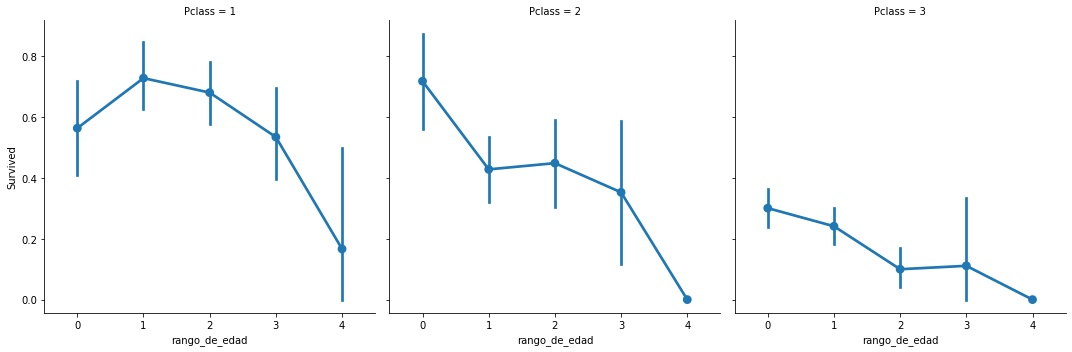

In [154]:
sns.factorplot('rango_de_edad', 'Survived', data=data, col='Pclass')

In [ ]:
# Problemas con la caracteristica del pasaje

In [155]:
data['rango_pasaje'] = pd.qcut(data['Fare'], 4)

In [156]:
data.groupby(['rango_pasaje'])['Survived'].mean().to_frame().style.background_gradient(cmap='twilight')

,Survived
rango_pasaje,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [157]:
data['categoria_pasaje'] = 0
data.loc[data['Fare'] <= 7.91, 'categoria_pasaje'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'categoria_pasaje'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31.0), 'categoria_pasaje'] = 2
data.loc[(data['Fare'] > 31.0) & (data['Fare'] <= 512.329), 'categoria_pasaje'] = 3

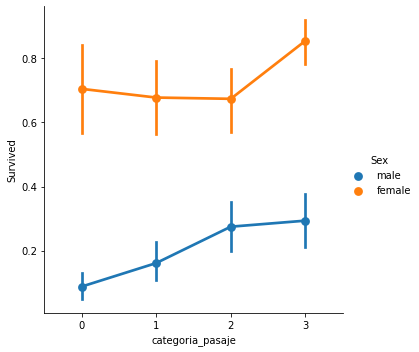

In [158]:
sns.factorplot('categoria_pasaje', 'Survived', data=data, hue = 'Sex')

In [ ]:
# Limpieza de datos: Convertir valores String a Numeric
# Codificación de variables categoricas

In [159]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,rango_de_edad,rango_pasaje,categoria_pasaje
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,"(7.91, 14.454]",1


In [160]:
data['Sex'].replace(['male', 'female'], [0,1], inplace = True)
data['Embarked'].replace(['S','C','Q'], [0,1,2], inplace = True)

In [161]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,rango_de_edad,rango_pasaje,categoria_pasaje
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0,1,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0,2,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1,"(7.91, 14.454]",1


In [ ]:
# Eliminar caracteristicas innecesarias

In [162]:
data.drop(['PassengerId', 'Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'rango_pasaje'], axis=1, inplace=True)

In [163]:
data.head(3)

,Survived,Pclass,Sex,SibSp,Parch,Embarked,rango_de_edad,categoria_pasaje
0,0,3,0,1,0,0.0,1,0
1,1,1,1,1,0,1.0,2,3
2,1,3,1,0,0,0.0,1,1


In [ ]:
# Tratamiento de datos Nulos

In [164]:
data.isnull().sum()

Survived            0
Pclass              0
Sex                 0
SibSp               0
Parch               0
Embarked            2
rango_de_edad       0
categoria_pasaje    0
dtype: int64

In [168]:
data[data['Embarked'].isnull() ]

,Survived,Pclass,Sex,SibSp,Parch,Embarked,rango_de_edad,categoria_pasaje
61,1,1,1,0,0,NaN,2,3
829,1,1,1,0,0,NaN,3,3


Text(0.5, 1.0, 'Número pasajeros que abordaron')

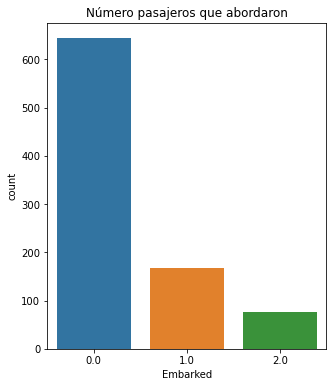

In [169]:
f, ax=plt.subplots(1,1, figsize=(5,6))

sns.countplot('Embarked', data=data, ax=ax)
ax.set_title('Número pasajeros que abordaron')

In [170]:
data['Embarked'].fillna(0, inplace = True)

In [172]:
data.isnull().sum()

Survived            0
Pclass              0
Sex                 0
SibSp               0
Parch               0
Embarked            0
rango_de_edad       0
categoria_pasaje    0
dtype: int64

In [175]:
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,rango_de_edad,categoria_pasaje
0,0,3,0,1,0,0.0,1,0
1,1,1,1,1,0,1.0,2,3
2,1,3,1,0,0,0.0,1,1
3,1,1,1,1,0,0.0,2,3
4,0,3,0,0,0,0.0,2,1
